# **Lab 7**

In [113]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from scipy import stats
import h5py
import pandas as pd
import pickle 

**Set Up**

In this lab, we will be performing event selection optimization. My lab partner and I will be using different pT samples. I will be using low-pT samples while my partner will be using high-pT samples. In each pT sample, there are dedicated training samples for event selection ptimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly. 

In [114]:
# higgs data
higgs_file = open("higgs_100000_pt_250_500.pkl",'rb')
higgs_dict = pickle.load(higgs_file)
higgs_data = pd.DataFrame(higgs_dict)
print("Higgs Data:", higgs_data.keys())

Higgs Data: Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [115]:
# qcd data
qcd_file = open("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcd_file)
qcd_data = pd.DataFrame(qcd_dict)
print("QCD Data:", qcd_data.keys())

QCD Data: Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


### **Problem 1**

In this problem, we want to make a stacked histogram plot for the mass feature. Afterwards, we plan to evaluate expected significance without any event selection.

**Section 1a**

Here, we will create a stacked histogram plot for the feature variable: mass. 

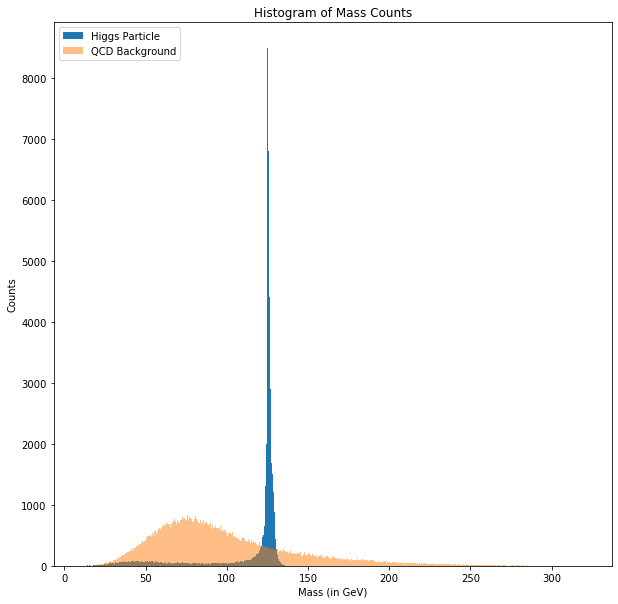

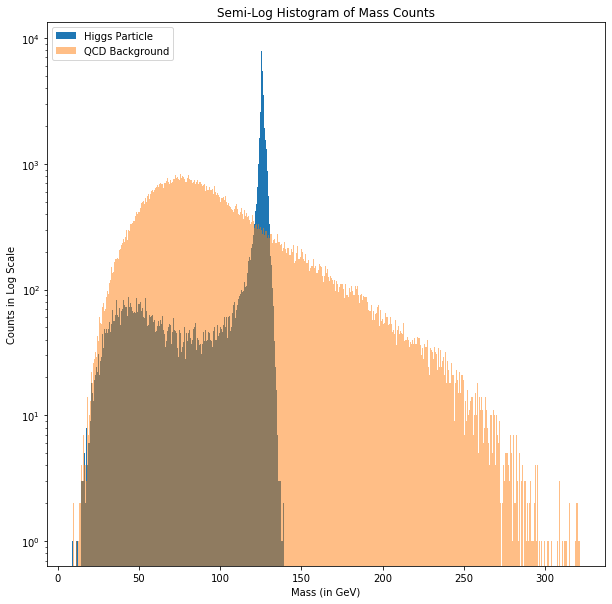

In [116]:
# hist plot of mass counts
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.hist(higgs_data.mass,500,label='Higgs Particle')
ax.hist(qcd_data.mass,500,alpha=.5,label='QCD Background')
ax.set_title("Histogram of Mass Counts")
ax.legend(loc='upper left')
ax.set_xlabel("Mass (in GeV)")
ax.set_ylabel("Counts")
plt.show()

# semi-log hist plot of mass counts
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.hist(higgs_data.mass,500,label='Higgs Particle')
ax.hist(qcd_data.mass,500,alpha=.5,label='QCD Background')
ax.set_title("Semi-Log Histogram of Mass Counts")
ax.legend(loc='upper left')
ax.set_xlabel("Mass (in GeV)")
ax.set_ylabel("Counts in Log Scale")
ax.set_yscale('log')
plt.show()

**Section 1b**

Here, we want to evaluate expected significance without any event selection. We will use Poisson statistics for significance calculation. 

In [117]:
n_higgs = 100
n_qcd = 20000

# theoretical yield
theoretical_sig = abs(stats.norm.ppf(1-stats.poisson.cdf(n_higgs+n_qcd, n_qcd)))
print("Theoretical Significance:", theoretical_sig)

Theoretical Significance: 0.7112259282313185


**Section 1c**

Here, we want to compare our number to $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$. Below, we see our significance calculated using Poisson statistics is approximately equal to the significance using the given equation. 

In [118]:
# observed yield
observed_sig = n_higgs/math.sqrt(n_qcd)
print("Observed Significance:", observed_sig)

Observed Significance: 0.7071067811865475


### **Problem 2**

In this problem, we want to identify mass cuts to optimize the expected significance. 

In [119]:
# returns an arr with values greater than a and b and its significance
def cut(a,b,higgs,qcd):
    # filter out values outside of a and b
    higgs_cut = higgs[higgs>a]
    higgs_cut = higgs_cut[higgs_cut<b]
    
    qcd_cut = qcd[qcd>a]
    qcd_cut = qcd_cut[qcd_cut<b]
    
    # gets cut version of array and significance
    higgs_n = 100*len(higgs_cut)/len(higgs)
    qcd_n = 20000*len(qcd_cut)/len(qcd)
    
    sig = abs(stats.norm.ppf(1-stats.poisson.cdf(higgs_n+qcd_n,qcd_n)))
    print(f"Significance for Range {a}-{b}:", sig)
    return higgs_cut, qcd_cut, sig

**Section 2a**

Here, we will try different mass cuts systematically. We will also evaluate the expected significance for each of the set of mass cuts. 

In [120]:
cut1 = cut(120,135,higgs_data.mass,qcd_data.mass)
cut2 = cut(121,134,higgs_data.mass,qcd_data.mass)
cut3 = cut(122,133,higgs_data.mass,qcd_data.mass)
cut4 = cut(123,132,higgs_data.mass,qcd_data.mass)
cut5 = cut(124,131,higgs_data.mass,qcd_data.mass)
cut6 = cut(125,130,higgs_data.mass,qcd_data.mass)
cut7 = cut(124,125,higgs_data.mass,qcd_data.mass)
cut8 = cut(124,126,higgs_data.mass,qcd_data.mass)
cut9 = cut(124,127,higgs_data.mass,qcd_data.mass)
cut10 = cut(124,128,higgs_data.mass,qcd_data.mass)
cut11 = cut(124,129,higgs_data.mass,qcd_data.mass)
cut_mass = cut10

Significance for Range 120-135: 2.0750895071916666
Significance for Range 121-134: 2.2033066847322917
Significance for Range 122-133: 2.3491780097499615
Significance for Range 123-132: 2.5224320849999584
Significance for Range 124-131: 2.6819756747659405
Significance for Range 125-130: 2.6509730547011916
Significance for Range 124-125: 1.1046188934935768
Significance for Range 124-126: 2.680060221998367
Significance for Range 124-127: 3.032183893894291
Significance for Range 124-128: 3.0337389952368543
Significance for Range 124-129: 2.9560007504111825


**Section 2b**

Here, we will identify the set of the mass cuts which gives us the highest significance. From above, we see the largest significance is approximately 3.0337. Thus, the set of the mass cuts which gives us the highest signifance is from 124 to 128. 

### **Problem 3**

Here, we will make stacked histogram plots for the rest of the features. 

**Section 3a**

Here, we will make a set of plots without any event selection. 

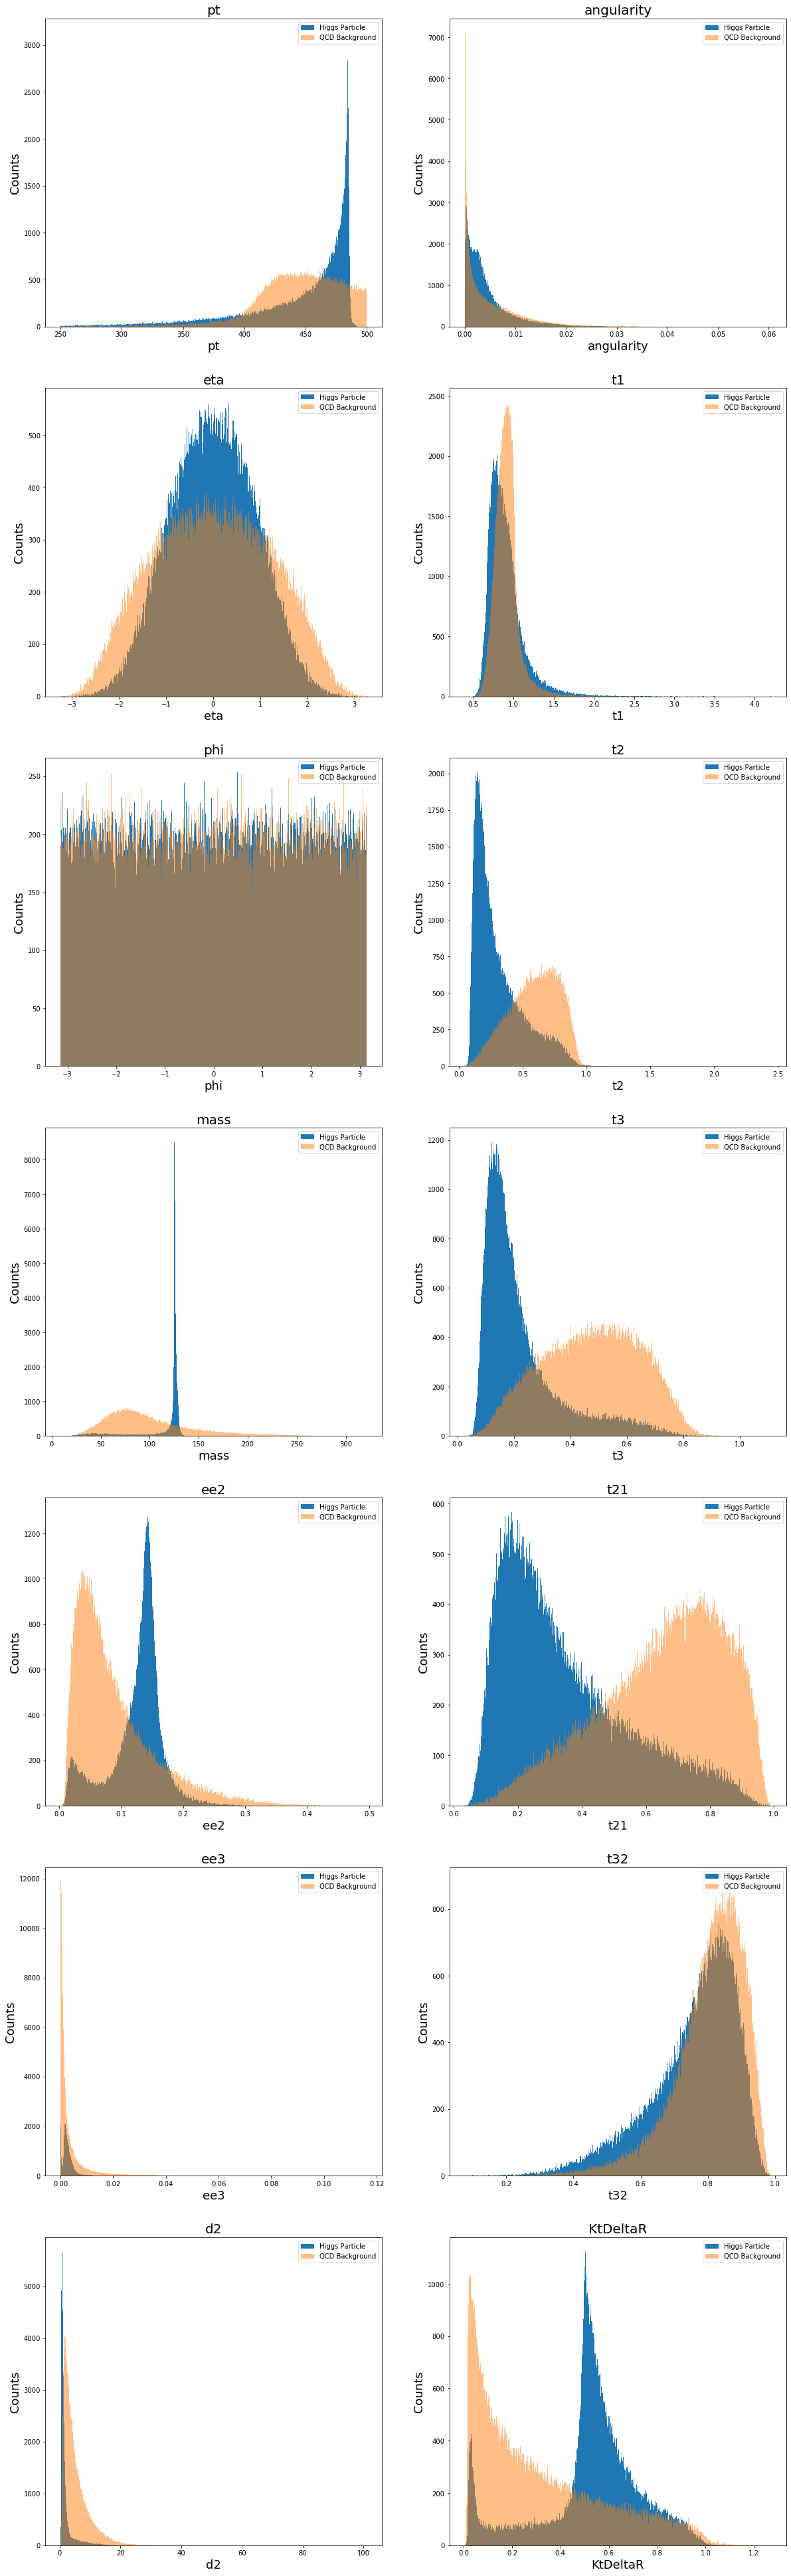

In [121]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(20,70)
features = ['pt','eta','phi','mass','ee2','ee3','d2', \
            'angularity','t1','t2','t3','t21','t32','KtDeltaR']

for i in range(7):
    title = features[i]
    ax[i,0].set_title(title, fontsize=20)
    ax[i,0].set_xlabel(title, fontsize=18)
    ax[i,0].set_ylabel('Counts', fontsize=18)
    
    title = features[i+7]
    ax[i,1].set_title(title, fontsize=20)
    ax[i,1].set_xlabel(title, fontsize=18)
    ax[i,1].set_ylabel('Counts', fontsize=18)

# pt
ax[0,0].hist(higgs_data.pt,500,label='Higgs Particle')
ax[0,0].hist(qcd_data.pt,500,alpha=.5,label='QCD Background')
ax[0,0].legend(loc='upper right')

# eta
ax[1,0].hist(higgs_data.eta,500,label='Higgs Particle')
ax[1,0].hist(qcd_data.eta,500,alpha=.5,label='QCD Background')
ax[1,0].legend(loc='upper right')

# phi
ax[2,0].hist(higgs_data.phi,500,label='Higgs Particle')
ax[2,0].hist(qcd_data.phi,500,alpha=.5,label='QCD Background')
ax[2,0].legend(loc='upper right')

# mass
ax[3,0].hist(higgs_data.mass,500,label='Higgs Particle')
ax[3,0].hist(qcd_data.mass,500,alpha=.5,label='QCD Background')
ax[3,0].legend(loc='upper right')

# ee2
ax[4,0].hist(higgs_data.ee2,500,label='Higgs Particle')
ax[4,0].hist(qcd_data.ee2,500,alpha=.5,label='QCD Background')
ax[4,0].legend(loc='upper right')

# ee3
ax[5,0].hist(higgs_data.ee3,500,label='Higgs Particle')
ax[5,0].hist(qcd_data.ee3,500,alpha=.5,label='QCD Background')
ax[5,0].legend(loc='upper right')

# d2
ax[6,0].hist(higgs_data.d2,500,label='Higgs Particle')
ax[6,0].hist(qcd_data.d2,500,alpha=.5,label='QCD Background')
ax[6,0].legend(loc='upper right')

# angularity
ax[0,1].hist(higgs_data.angularity,500,label='Higgs Particle')
ax[0,1].hist(qcd_data.angularity,500,alpha=.5,label='QCD Background')
ax[0,1].legend(loc='upper right')

# t1
ax[1,1].hist(higgs_data.t1,500,label='Higgs Particle')
ax[1,1].hist(qcd_data.t1,500,alpha=.5,label='QCD Background')
ax[1,1].legend(loc='upper right')

# t2
ax[2,1].hist(higgs_data.t2,500,label='Higgs Particle')
ax[2,1].hist(qcd_data.t2,500,alpha=.5,label='QCD Background')
ax[2,1].legend(loc='upper right')

# t3
ax[3,1].hist(higgs_data.t3,500,label='Higgs Particle')
ax[3,1].hist(qcd_data.t3,500,alpha=.5,label='QCD Background')
ax[3,1].legend(loc='upper right')

# t21
ax[4,1].hist(higgs_data.t21,500,label='Higgs Particle')
ax[4,1].hist(qcd_data.t21,500,alpha=.5,label='QCD Background')
ax[4,1].legend(loc='upper right')

# t32
ax[5,1].hist(higgs_data.t32,500,label='Higgs Particle')
ax[5,1].hist(qcd_data.t32,500,alpha=.5,label='QCD Background')
ax[5,1].legend(loc='upper right')

# KtDeltaR
ax[6,1].hist(higgs_data.KtDeltaR,500,label='Higgs Particle')
ax[6,1].hist(qcd_data.KtDeltaR,500,alpha=.5,label='QCD Background')
ax[6,1].legend(loc='upper right')
plt.show()

**Section 3b**

Here, we want to identify another feature as discriminative as mass feature. In our opinion, I believe some other discriminative features include pt, eta, t2, ee2, t3, t21, and KtDeltaR. This is because there are obvious spikes in the Higgs data with some background data which is similar to that of the mass feature plot. 

**Section 3c**

Here, we will make a set of plots with our optimal mass cuts. For reference, our optimal mass cut was in the range of 124 to 128 from Problem 2.

In [122]:
# returns arr with optimal mass cut
def opt_cut(higgs,qcd):
    # filter out values outside of optimal mass cut
    higgs_cut = higgs[higgs_data.mass>124]
    higgs_cut = higgs_cut[higgs_data.mass<128]
    
    qcd_cut = qcd[qcd_data.mass>124]
    qcd_cut = qcd_cut[qcd_data.mass<128]

    return higgs_cut, qcd_cut

In [123]:
# feature cuts with optimal mass cut in range 124 to 128
opt_pt = opt_cut(higgs_data.pt,qcd_data.pt)
opt_eta = opt_cut(higgs_data.eta,qcd_data.eta)
opt_phi = opt_cut(higgs_data.phi,qcd_data.phi)
opt_ee2 = opt_cut(higgs_data.ee2,qcd_data.ee2)
opt_ee3 = opt_cut(higgs_data.ee3,qcd_data.ee3)
opt_d2 = opt_cut(higgs_data.d2,qcd_data.d2)
opt_angularity = opt_cut(higgs_data.angularity,qcd_data.angularity)
opt_t1 = opt_cut(higgs_data.t1,qcd_data.t1)
opt_t2 = opt_cut(higgs_data.t2,qcd_data.t2)
opt_t3 = opt_cut(higgs_data.t3,qcd_data.t3)
opt_t21 = opt_cut(higgs_data.t21,qcd_data.t21)
opt_t32 = opt_cut(higgs_data.t32,qcd_data.t32)
opt_KtDeltaR = opt_cut(higgs_data.KtDeltaR,qcd_data.KtDeltaR)

In [124]:
# pt
cut1 = cut(470,490,opt_pt[0],opt_pt[1])
cut2 = cut(471,489,opt_pt[0],opt_pt[1])
cut3 = cut(472,488,opt_pt[0],opt_pt[1])
cut4 = cut(473,487,opt_pt[0],opt_pt[1])
cut5 = cut(474,486,opt_pt[0],opt_pt[1])
cut6 = cut(473,488,opt_pt[0],opt_pt[1])
cut7 = cut(473,489,opt_pt[0],opt_pt[1])
cut8 = cut(474,488,opt_pt[0],opt_pt[1])
cut9 = cut(474,488,opt_pt[0],opt_pt[1])
cut_pt = cut4

Significance for Range 470-490: 0.7166461337879225
Significance for Range 471-489: 0.7221631739029025
Significance for Range 472-488: 0.7483599626389699
Significance for Range 473-487: 0.7702728237489497
Significance for Range 474-486: 0.7699246563407467
Significance for Range 473-488: 0.756141550256767
Significance for Range 473-489: 0.7333529671357732
Significance for Range 474-488: 0.7351948232043016
Significance for Range 474-488: 0.7351948232043016


In [125]:
# eta
cut1 = cut(-2,2,opt_eta[0],opt_eta[1])
cut2 = cut(-1.9,1.9,opt_eta[0],opt_eta[1])
cut3 = cut(-1.8,1.8,opt_eta[0],opt_eta[1])
cut4 = cut(-1.7,1.7,opt_eta[0],opt_eta[1])
cut5 = cut(-1.6,1.6,opt_eta[0],opt_eta[1])
cut6 = cut(-1.5,1.5,opt_eta[0],opt_eta[1])
cut7 = cut(-1.4,1.4,opt_eta[0],opt_eta[1])
cut8 = cut(-1.3,1.3,opt_eta[0],opt_eta[1])
cut9 = cut(-1.2,1.2,opt_eta[0],opt_eta[1])
cut_eta = cut4

Significance for Range -2-2: 0.7236840738687303
Significance for Range -1.9-1.9: 0.7268871792753838
Significance for Range -1.8-1.8: 0.7309735341050593
Significance for Range -1.7-1.7: 0.7371100423821891
Significance for Range -1.6-1.6: 0.7314579284613218
Significance for Range -1.5-1.5: 0.7268298533798107
Significance for Range -1.4-1.4: 0.727526855852403
Significance for Range -1.3-1.3: 0.7200100910775801
Significance for Range -1.2-1.2: 0.7065248290625837


In [126]:
# phi
cut1 = cut(-1,1,opt_phi[0],opt_phi[1])
cut2 = cut(-0.9,0.9,opt_phi[0],opt_phi[1])
cut3 = cut(-1,0.8,opt_phi[0],opt_phi[1])
cut3 = cut(-3,3,opt_phi[0],opt_phi[1])
cut4 = cut(-1,1.1,opt_phi[0],opt_phi[1])
cut5 = cut(-1.1,1.1,opt_phi[0],opt_phi[1])
cut6 = cut(-1.2,1.2,opt_phi[0],opt_phi[1])
cut7 = cut(-1.3,1.3,opt_phi[0],opt_phi[1])
cut8 = cut(-1.4,1.5,opt_phi[0],opt_phi[1])
cut9 = cut(-2,2,opt_phi[0],opt_phi[1])
cut_phi = cut4

Significance for Range -1-1: 0.4035219447712732
Significance for Range -0.9-0.9: 0.37985593824607
Significance for Range -1-0.8: 0.38299999581820815
Significance for Range -3-3: 0.6955498072712277
Significance for Range -1-1.1: 0.4189806059697728
Significance for Range -1.1-1.1: 0.42248356445938584
Significance for Range -1.2-1.2: 0.4417487503456905
Significance for Range -1.3-1.3: 0.451447485304132
Significance for Range -1.4-1.5: 0.4776229772988958
Significance for Range -2-2: 0.5632072272761244


In [127]:
# ee2
cut1 = cut(0.1,0.2,opt_ee2[0],opt_ee2[1])
cut2 = cut(0.11,0.19,opt_ee2[0],opt_ee2[1])
cut3 = cut(0.12,0.18,opt_ee2[0],opt_ee2[1])
cut4 = cut(0.13,0.17,opt_ee2[0],opt_ee2[1])
cut5 = cut(0.14,0.15,opt_ee2[0],opt_ee2[1])
cut6 = cut(0.12,0.19,opt_ee2[0],opt_ee2[1])
cut7 = cut(0.12,0.2,opt_ee2[0],opt_ee2[1])
cut8 = cut(0.12,0.21,opt_ee2[0],opt_ee2[1])
cut9 = cut(0.12,0.22,opt_ee2[0],opt_ee2[1])
cut_ee2 = cut9

Significance for Range 0.1-0.2: 0.7174192778390179
Significance for Range 0.11-0.19: 0.7242413548832426
Significance for Range 0.12-0.18: 0.7339414809673049
Significance for Range 0.13-0.17: 0.7157802024089173
Significance for Range 0.14-0.15: 0.47541842499158854
Significance for Range 0.12-0.19: 0.750314970318641
Significance for Range 0.12-0.2: 0.7563465024545822
Significance for Range 0.12-0.21: 0.7615473478004994
Significance for Range 0.12-0.22: 0.7667293022965367


In [128]:
# ee3
cut1 = cut(0,0.05,opt_ee3[0],opt_ee3[1])
cut2 = cut(0.01,0.04,opt_ee3[0],opt_ee3[1])
cut3 = cut(0.02,0.03,opt_ee3[0],opt_ee3[1])
cut4 = cut(0,0.04,opt_ee3[0],opt_ee3[1])
cut5 = cut(0,0.03,opt_ee3[0],opt_ee3[1])
cut6 = cut(0,0.02,opt_ee3[0],opt_ee3[1])
cut7 = cut(0,0.01,opt_ee3[0],opt_ee3[1])
cut8 = cut(0,0.06,opt_ee3[0],opt_ee3[1])
cut9 = cut(0,0.07,opt_ee3[0],opt_ee3[1])
cut_ee3 = cut1

Significance for Range 0-0.05: 0.7112259282313185
Significance for Range 0.01-0.04: 0.04180333239930906
Significance for Range 0.02-0.03: 0.06775503046284756
Significance for Range 0-0.04: 0.7112259282313185
Significance for Range 0-0.03: 0.7112259282313185
Significance for Range 0-0.02: 0.7075230733000805
Significance for Range 0-0.01: 0.7107471495553705
Significance for Range 0-0.06: 0.7112259282313185
Significance for Range 0-0.07: 0.7112259282313185


In [129]:
# d2
cut1 = cut(0,8,opt_d2[0],opt_d2[1])
cut2 = cut(0,0.9,opt_d2[0],opt_d2[1])
cut3 = cut(0,2,opt_d2[0],opt_d2[1])
cut4 = cut(0,1,opt_d2[0],opt_d2[1])
cut5 = cut(0,0.8,opt_d2[0],opt_d2[1])
cut6 = cut(0,0.7,opt_d2[0],opt_d2[1])
cut7 = cut(0,3,opt_d2[0],opt_d2[1])
cut8 = cut(0,4,opt_d2[0],opt_d2[1])
cut9 = cut(0,5,opt_d2[0],opt_d2[1])
cut_d2 = cut5

Significance for Range 0-8: 0.7112259282313185
Significance for Range 0-0.9: 4.187761208236905
Significance for Range 0-2: 1.1277286565210762
Significance for Range 0-1: 3.4342371423507068
Significance for Range 0-0.8: 4.405256799282586
Significance for Range 0-0.7: 3.6705641832024423
Significance for Range 0-3: 0.8039673195656251
Significance for Range 0-4: 0.7318423687544737
Significance for Range 0-5: 0.7141832600449217


In [130]:
# angularity
cut1 = cut(0,0.008,opt_angularity[0],opt_angularity[1])
cut2 = cut(0,0.009,opt_angularity[0],opt_angularity[1])
cut3 = cut(0,0.007,opt_angularity[0],opt_angularity[1])
cut4 = cut(0,0.006,opt_angularity[0],opt_angularity[1])
cut5 = cut(0,0.005,opt_angularity[0],opt_angularity[1])
cut6 = cut(0,0.004,opt_angularity[0],opt_angularity[1])
cut7 = cut(0,0.0069,opt_angularity[0],opt_angularity[1])
cut8 = cut(0,0.0068,opt_angularity[0],opt_angularity[1])
cut9 = cut(0,0.0067,opt_angularity[0],opt_angularity[1])
cut_angularity = cut3

Significance for Range 0-0.008: 0.7719750467641883
Significance for Range 0-0.009: 0.7695569028093594
Significance for Range 0-0.007: 0.7819144033937808
Significance for Range 0-0.006: 0.7715953567647479
Significance for Range 0-0.005: 0.7547793693752892
Significance for Range 0-0.004: 0.7059330225021029
Significance for Range 0-0.0069: 0.7809193577918905
Significance for Range 0-0.0068: 0.7804227047934543
Significance for Range 0-0.0067: 0.7745174270471025


In [131]:
# t1
cut1 = cut(0,1,opt_t1[0],opt_t1[1])
cut2 = cut(0,1.5,opt_t1[0],opt_t1[1])
cut3 = cut(0,0.9,opt_t1[0],opt_t1[1])
cut4 = cut(0,1.1,opt_t1[0],opt_t1[1])
cut5 = cut(0,1.6,opt_t1[0],opt_t1[1])
cut6 = cut(0,1.7,opt_t1[0],opt_t1[1])
cut7 = cut(0,1.8,opt_t1[0],opt_t1[1])
cut8 = cut(0,1.9,opt_t1[0],opt_t1[1])
cut9 = cut(0,2,opt_t1[0],opt_t1[1])
cut_t1 = cut9

Significance for Range 0-1: 0.5930843289716194
Significance for Range 0-1.5: 0.6875538897410037
Significance for Range 0-0.9: 0.5672772463517358
Significance for Range 0-1.1: 0.6256508418103138
Significance for Range 0-1.6: 0.6987088584534583
Significance for Range 0-1.7: 0.7027723174809759
Significance for Range 0-1.8: 0.7031211511462978
Significance for Range 0-1.9: 0.7068297916992121
Significance for Range 0-2: 0.7071765170700753


In [132]:
# t2
cut1 = cut(0,0.5,opt_t2[0],opt_t2[1])
cut2 = cut(0,0.6,opt_t2[0],opt_t2[1])
cut3 = cut(0,0.4,opt_t2[0],opt_t2[1])
cut4 = cut(0,0.3,opt_t2[0],opt_t2[1])
cut5 = cut(0,0.2,opt_t2[0],opt_t2[1])
cut6 = cut(0,0.1,opt_t2[0],opt_t2[1])
cut7 = cut(0,0.25,opt_t2[0],opt_t2[1])
cut8 = cut(0,0.27,opt_t2[0],opt_t2[1])
cut9 = cut(0,0.22,opt_t2[0],opt_t2[1])
cut_t2 = cut5

Significance for Range 0-0.5: 0.9704388200332211
Significance for Range 0-0.6: 0.8438747603454545
Significance for Range 0-0.4: 1.1619010283895617
Significance for Range 0-0.3: 1.4365280308471338
Significance for Range 0-0.2: 2.203048176213319
Significance for Range 0-0.1: 0.9523858365301119
Significance for Range 0-0.25: 1.7178336393656906
Significance for Range 0-0.27: 1.6333241629345356
Significance for Range 0-0.22: 1.9402823538424125


In [133]:
# t3
cut1 = cut(0,0.3,opt_t3[0],opt_t3[1])
cut2 = cut(0,0.2,opt_t3[0],opt_t3[1])
cut3 = cut(0,0.1,opt_t3[0],opt_t3[1])
cut4 = cut(0,0.14,opt_t3[0],opt_t3[1])
cut5 = cut(0,0.15,opt_t3[0],opt_t3[1])
cut6 = cut(0,0.16,opt_t3[0],opt_t3[1])
cut7 = cut(0,0.17,opt_t3[0],opt_t3[1])
cut8 = cut(0,0.19,opt_t3[0],opt_t3[1])
cut9 = cut(0,0.18,opt_t3[0],opt_t3[1])
cut_t3 = cut4

Significance for Range 0-0.3: 1.2366688807405828
Significance for Range 0-0.2: 1.927505238947815
Significance for Range 0-0.1: 1.7589861854021396
Significance for Range 0-0.14: 2.500134813493844
Significance for Range 0-0.15: 2.455023162386318
Significance for Range 0-0.16: 2.332880295174933
Significance for Range 0-0.17: 2.2061281203748755
Significance for Range 0-0.19: 2.021433732673709
Significance for Range 0-0.18: 2.1092874775359403


In [134]:
# t21
cut1 = cut(0,0.4,opt_t21[0],opt_t21[1])
cut2 = cut(0,0.3,opt_t21[0],opt_t21[1])
cut3 = cut(0,0.2,opt_t21[0],opt_t21[1])
cut4 = cut(0,0.25,opt_t21[0],opt_t21[1])
cut5 = cut(0,0.5,opt_t21[0],opt_t21[1])
cut6 = cut(0,0.22,opt_t21[0],opt_t21[1])
cut7 = cut(0,0.21,opt_t21[0],opt_t21[1])
cut8 = cut(0,0.19,opt_t21[0],opt_t21[1])
cut9 = cut(0,0.18,opt_t21[0],opt_t21[1])
cut_t21 = cut9

Significance for Range 0-0.4: 1.378479151422568
Significance for Range 0-0.3: 1.7702774629251845
Significance for Range 0-0.2: 2.119641982637352
Significance for Range 0-0.25: 1.9745507457686071
Significance for Range 0-0.5: 1.119222294993089
Significance for Range 0-0.22: 1.9810191563977706
Significance for Range 0-0.21: 2.0520386484688844
Significance for Range 0-0.19: 1.9589845540871542
Significance for Range 0-0.18: 2.1939338779686968


In [135]:
# t32
cut1 = cut(0.7,1,opt_t32[0],opt_t32[1])
cut2 = cut(0.8,0.9,opt_t32[0],opt_t32[1])
cut3 = cut(0.6,1,opt_t32[0],opt_t32[1])
cut4 = cut(0.5,1,opt_t32[0],opt_t32[1])
cut5 = cut(0.4,1,opt_t32[0],opt_t32[1])
cut6 = cut(0.3,1,opt_t32[0],opt_t32[1])
cut7 = cut(0.2,1,opt_t32[0],opt_t32[1])
cut8 = cut(0.1,1,opt_t32[0],opt_t32[1])
cut9 = cut(0.25,1,opt_t32[0],opt_t32[1])
cut_t32 = cut9

Significance for Range 0.7-1: 0.5750349219747674
Significance for Range 0.8-0.9: 0.4474037389268248
Significance for Range 0.6-1: 0.6330491728459399
Significance for Range 0.5-1: 0.667894844860502
Significance for Range 0.4-1: 0.6923381560529307
Significance for Range 0.3-1: 0.7038183014603254
Significance for Range 0.2-1: 0.7041666186174523
Significance for Range 0.1-1: 0.7041666186174523
Significance for Range 0.25-1: 0.7075230733000805


In [136]:
# KtDeltaR
cut1 = cut(0.4,0.8,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut2 = cut(0.5,0.7,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut3 = cut(0.3,0.9,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut4 = cut(0.4,0.9,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut5 = cut(0.3,0.9,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut6 = cut(0.41,0.79,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut7 = cut(0.42,0.78,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut8 = cut(0.43,0.77,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut9 = cut(0.44,0.76,opt_KtDeltaR[0],opt_KtDeltaR[1])
cut_KtDeltaR = cut9

Significance for Range 0.4-0.8: 0.9147972490682639
Significance for Range 0.5-0.7: 0.9035002267519312
Significance for Range 0.3-0.9: 0.8086370863327718
Significance for Range 0.4-0.9: 0.8998030345655254
Significance for Range 0.3-0.9: 0.8086370863327718
Significance for Range 0.41-0.79: 0.9293849194768574
Significance for Range 0.42-0.78: 0.9348594231571993
Significance for Range 0.43-0.77: 0.9519593760513878
Significance for Range 0.44-0.76: 0.9597062608756513


In [ ]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(20,70)
features = ['pt','eta','phi','mass','ee2','ee3','d2', \
            'angularity','t1','t2','t3','t21','t32','KtDeltaR']

for i in range(7):
    title = features[i]
    ax[i,0].set_title(title, fontsize=20)
    ax[i,0].set_xlabel(title, fontsize=18)
    ax[i,0].set_ylabel('Counts', fontsize=18)
    
    title = features[i+7]
    ax[i,1].set_title(title, fontsize=20)
    ax[i,1].set_xlabel(title, fontsize=18)
    ax[i,1].set_ylabel('Counts', fontsize=18)

# pt
ax[0,0].hist(cut_pt[0],500,label='Higgs Particle')
ax[0,0].hist(cut_pt[1],500,alpha=.5,label='QCD Background')
ax[0,0].legend(loc='upper right')

# eta
ax[1,0].hist(cut_eta[0],500,label='Higgs Particle')
ax[1,0].hist(cut_eta[1],500,alpha=.5,label='QCD Background')
ax[1,0].legend(loc='upper right')

# phi
ax[2,0].hist(cut_phi[0],500,label='Higgs Particle')
ax[2,0].hist(cut_phi[1],500,alpha=.5,label='QCD Background')
ax[2,0].legend(loc='upper right')

# mass
ax[3,0].hist(cut_mass[0],500,label='Higgs Particle')
ax[3,0].hist(cut_mass[1],500,alpha=.5,label='QCD Background')
ax[3,0].legend(loc='upper right')

# ee2
ax[4,0].hist(cut_ee2[0],500,label='Higgs Particle')
ax[4,0].hist(cut_ee2[1],500,alpha=.5,label='QCD Background')
ax[4,0].legend(loc='upper right')

# ee3
ax[5,0].hist(cut_ee3[0],500,label='Higgs Particle')
ax[5,0].hist(cut_ee3[1],500,alpha=.5,label='QCD Background')
ax[5,0].legend(loc='upper right')

# d2
ax[6,0].hist(cut_d2[0],500,label='Higgs Particle')
ax[6,0].hist(cut_d2[1],500,alpha=.5,label='QCD Background')
ax[6,0].legend(loc='upper right')

# angularity
ax[0,1].hist(cut_angularity[0],500,label='Higgs Particle')
ax[0,1].hist(cut_angularity[1],500,alpha=.5,label='QCD Background')
ax[0,1].legend(loc='upper right')

# t1
ax[1,1].hist(cut_t1[0],500,label='Higgs Particle')
ax[1,1].hist(cut_t1[0],500,alpha=.5,label='QCD Background')
ax[1,1].legend(loc='upper right')

# t2
ax[2,1].hist(cut_t2[0],500,label='Higgs Particle')
ax[2,1].hist(cut_t2[1],500,alpha=.5,label='QCD Background')
ax[2,1].legend(loc='upper right')

# t3
ax[3,1].hist(cut_t3[0],500,label='Higgs Particle')
ax[3,1].hist(cut_t3[1],500,alpha=.5,label='QCD Background')
ax[3,1].legend(loc='upper right')

# t21
ax[4,1].hist(cut_t21[0],500,label='Higgs Particle')
ax[4,1].hist(cut_t21[1],500,alpha=.5,label='QCD Background')
ax[4,1].legend(loc='upper right')

# t32
ax[5,1].hist(cut_t32[0],500,label='Higgs Particle')
ax[5,1].hist(cut_t32[1],500,alpha=.5,label='QCD Background')
ax[5,1].legend(loc='upper right')

# KtDeltaR
ax[6,1].hist(cut_KtDeltaR[0],500,label='Higgs Particle')
ax[6,1].hist(cut_KtDeltaR[1],500,alpha=.5,label='QCD Background')
ax[6,1].legend(loc='upper right')
plt.show()

**Section 3d**

Here, we want to identify additional features to further improve expected significance. We see our cuts have removed most of the background data in each of the plots. I am unsure if there are additional features to further improve expected significance considering the significance for each of these features are approximately equal to each other. However, the features which stand out the most are d2, t21, and t3 since they have the largest significance. 

### **Problem 4**

In this problem, we want to optimize event selections using multiple features if necessary. 

**Section 4a**

Here, we want to find a set of feature cuts which can help us achieve the best significance. 

In [ ]:
# returns arr with optimal d2 cut
def opt_cut2(higgs,qcd):
    # filter out values outside of optimal mass cut
    higgs_cut = higgs[higgs_data.d2>0]
    higgs_cut = higgs_cut[higgs_data.d2<0.8]
    
    qcd_cut = qcd[qcd_data.d2>0]
    qcd_cut = qcd_cut[qcd_data.d2<0.8]

    return higgs_cut, qcd_cut

In [ ]:
# feature cuts with optimal mass cut (124-128) and optimal d2 cut (0-0.8)
opt_d2s = opt_cut2(opt_d2[0],opt_d2[1])

In [ ]:
# d2
cut1 = cut(0.3,8,opt_d2s[0],opt_d2s[1])
cut2 = cut(0.3,0.52,opt_d2s[0],opt_d2s[1])
cut3 = cut(0,0.55,opt_d2s[0],opt_d2s[1])
cut4 = cut(0,0.6,opt_d2s[0],opt_d2s[1])
cut5 = cut(0,0.7,opt_d2s[0],opt_d2s[1])
cut6 = cut(0,0.5,opt_d2s[0],opt_d2s[1])
cut7 = cut(0.3,0.7,opt_d2s[0],opt_d2s[1])
cut8 = cut(0.2,0.8,opt_d2s[0],opt_d2s[1])
cut9 = cut(0.5,0.8,opt_d2s[0],opt_d2s[1])
cut_d2 = cut6

In [ ]:
# optimal d2 cut plot
plt.figure(figsize=(10,10))
plt.hist(cut_d2[0],50,label='Higgs Particle')
plt.hist(cut_d2[1],50,alpha=.5,label='QCD Background')
plt.legend(loc='upper left')
plt.show()

**Section 4b**

Here, we want to compare the significance before and after event selection derived in pT sample to my lab partner. Afterwards, we want to describe our findings. 

After discussion with my lab partner, we found we had the most similarities with the feature d2. I had a significance of 0.708, 4.405, and infinity before and after event selection for d2. My partner had a significance of 5.284 and infinity before and after event selection for d2. Thus, our signifiance is approximately the same before and after event selection. So, we can see our pT sample and our cuts show how mass is correlated to d2. 